<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/CEEMDAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis using EMD and Dilated Convolutional Neural Networks¶**
https://github.com/3catz/deeplearning_timeseries/blob/master/Air_Quality_Time_Series_Series_Forecasting_with_EEMD_and_Fully_Convolutional_Neural_Networks.ipynb

In [1]:
!pip install EMD-signal

     |████████████████████████████████| 64 kB 1.2 MB/s 
     |████████████████████████████████| 81 kB 5.7 MB/s 
     |████████████████████████████████| 65 kB 2.8 MB/s 


In [2]:
from PyEMD import CEEMDAN 

In [3]:
#pip install PeakUtils
from sklearn.preprocessing import MinMaxScaler, RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score

import matplotlib.pyplot as plt
import os 
from scipy.integrate import odeint

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [5]:
data= pd.read_csv("/content/BE_price.csv")

In [6]:
import numpy as np
data = np.genfromtxt("BE_price.csv", delimiter = ","); data = np.asarray(data); data.shape

(52416,)

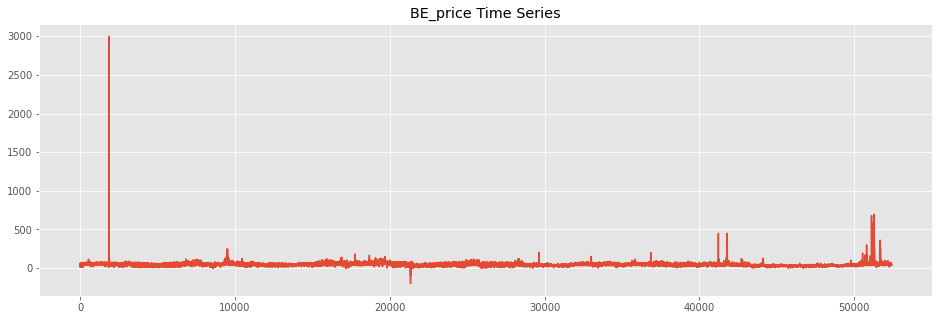

In [7]:
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("BE_price Time Series")
plt.show()

In [8]:
#Scale the Data
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(data.reshape(-1,1))
scaled_data.shape
scaled_data = np.squeeze(scaled_data)
scaled_data.shape

(52416,)

In [9]:
scaled_data = np.transpose(scaled_data)

In [10]:
# before you do the EMD, cut out the out of sample part so that the EMDs are not constructed with those future values and information contained within them

in_sample = scaled_data[:-17472]; out_sample = scaled_data[-17472:]
print(in_sample.shape)
print(in_sample)

(34944,)
[-0.85461707 -0.86148796 -0.86513911 ... -0.84842763 -0.84868396
 -0.84938418]


In [11]:
in_sample = in_sample.reshape(-1,1)
out_sample = out_sample.reshape(-1,1)
print(in_sample)

[[-0.85461707]
 [-0.86148796]
 [-0.86513911]
 ...
 [-0.84842763]
 [-0.84868396]
 [-0.84938418]]


In [12]:
ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)

In [13]:
#Ceemdan for in-sample
ceemdan = CEEMDAN()
ceemdan.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)



(34944, 1) (34944, 1)


In [16]:
 C_IMFs_in = ceemdan(in_sample, t, 8)
 print(C_IMFs_in.shape)

(9, 34944)


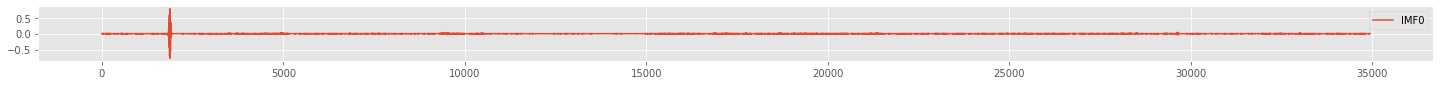

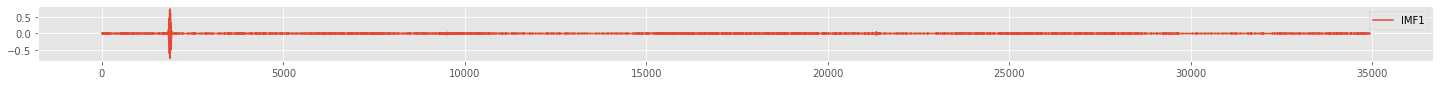

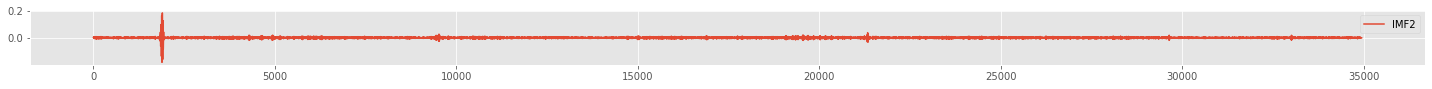

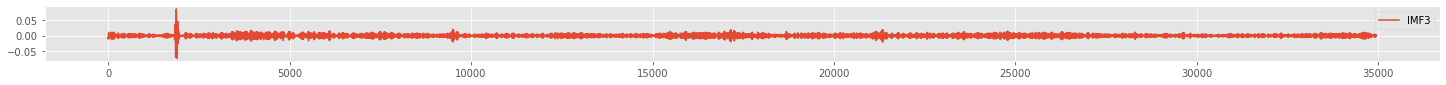

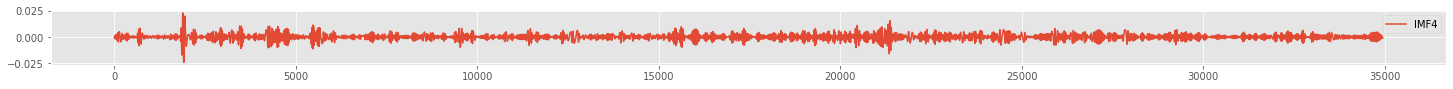

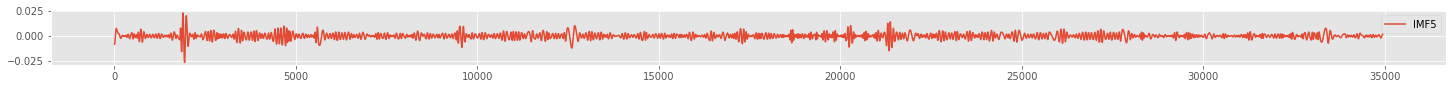

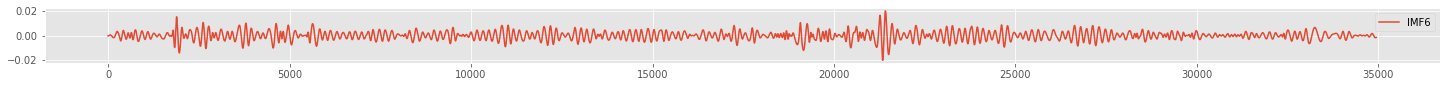

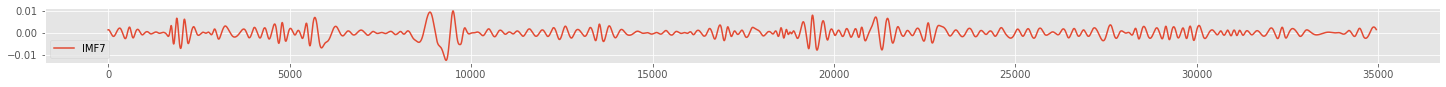

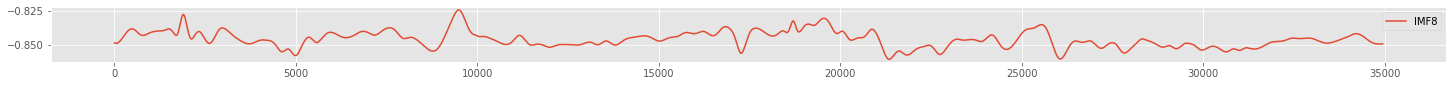

In [17]:
for i in range(len(C_IMFs_in)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(C_IMFs_in[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [19]:
#Ceemdan for out-sample
ceemdan = CEEMDAN()
ceemdan.extrema_detection = "simple"
t_out = np.linspace(0, out_sample.shape[0], out_sample.shape[0])
t_out = t_out.reshape(-1,1)
print(t_out.shape, out_sample.shape)
t_out = np.squeeze(t_out)
out_sample = np.squeeze(out_sample)

(17472, 1) (17472, 1)


In [21]:
#ceemdan for out-sample
C_IMFs_out = ceemdan(out_sample, t_out, 8)
print(C_IMFs_out.shape)

(9, 17472)


In [22]:
print(C_IMFs_out.shape)

(9, 17472)


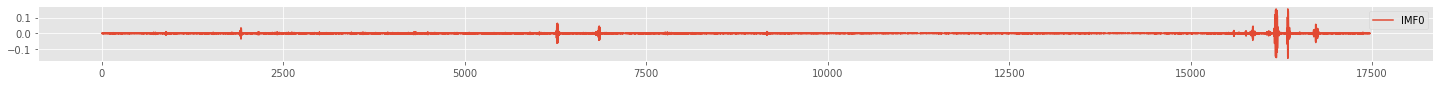

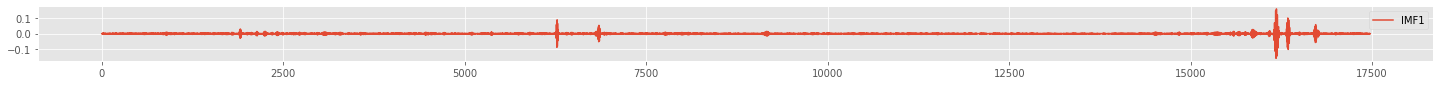

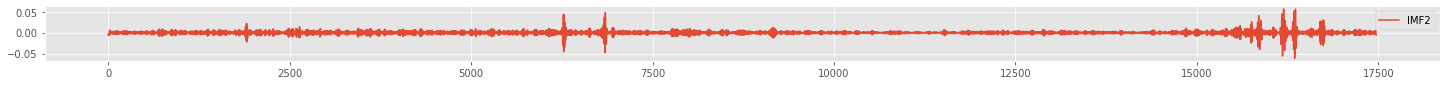

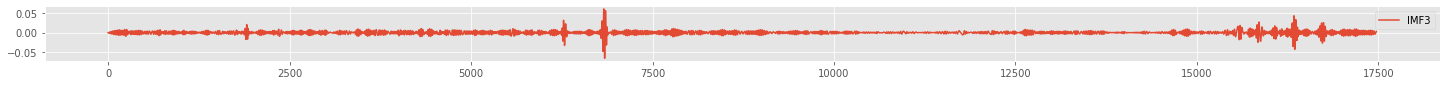

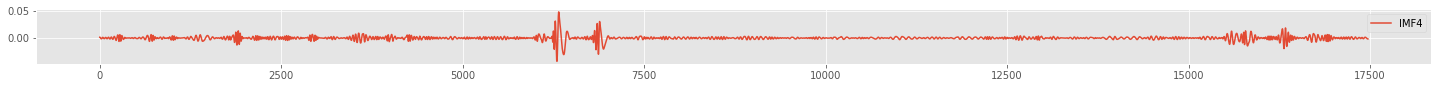

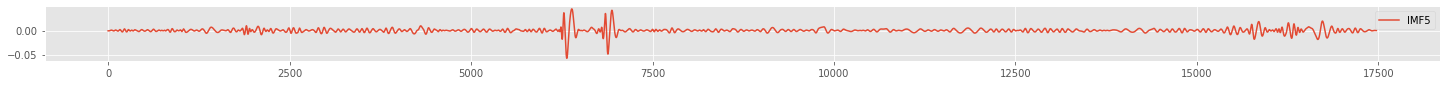

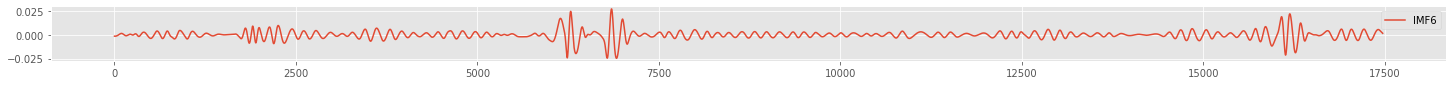

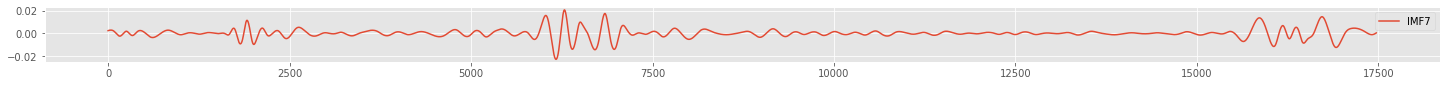

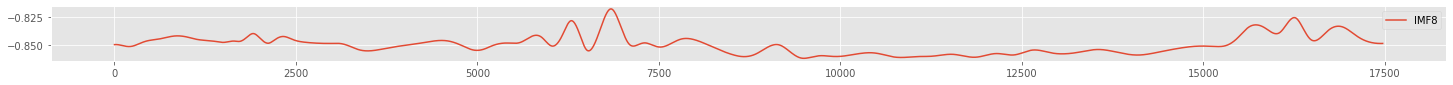

In [23]:
for i in range(len(C_IMFs_out)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(C_IMFs_out[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [24]:
# Save in_sample and out_sample decomposition data
from pandas import DataFrame
import pandas as pd
import csv
Ceedan_in_sample=pd.DataFrame(C_IMFs_in).T
Ceedan_out_sample=pd.DataFrame(C_IMFs_out).T
# Save as csv
Ceedan_in_sample.to_csv("Ceedan_in_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
Ceedan_out_sample.to_csv("Ceedan_out_sample.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

# Save as excel
Ceedan_in_sample.to_excel("Ceedan_in_sample.xlsx", header=True)
Ceedan_out_sample.to_excel("Ceedan_out_sample.xlsx", header=True)
print(Ceedan_in_sample)
print(Ceedan_out_sample)



              0         1         2  ...         6         7         8
0      0.000390  0.002804  0.004057  ... -0.000280  0.001377 -0.848707
1     -0.000548 -0.002144  0.004796  ... -0.000293  0.001389 -0.848723
2      0.000348 -0.003974  0.003863  ... -0.000303  0.001400 -0.848738
3     -0.000554 -0.001971  0.001155  ... -0.000311  0.001410 -0.848753
4      0.000520  0.001211 -0.002159  ... -0.000316  0.001418 -0.848768
...         ...       ...       ...  ...       ...       ...       ...
34939 -0.001820  0.002168  0.000310  ... -0.001626  0.001640 -0.849456
34940 -0.002324  0.000841  0.000155  ... -0.001608  0.001610 -0.849452
34941 -0.000466 -0.001112 -0.000066  ... -0.001589  0.001580 -0.849448
34942  0.001537 -0.002512 -0.000316  ... -0.001569  0.001550 -0.849445
34943  0.001729 -0.002509 -0.000556  ... -0.001548  0.001519 -0.849441

[34944 rows x 9 columns]
              0         1         2  ...         6         7         8
0      0.000240 -0.000365 -0.004316  ... -0.001434 

In [26]:

# Merge in_ and out_samples in one file and save the full decomposed sample  

frames = [Ceedan_in_sample, Ceedan_out_sample]

BE_price_Ceedan = pd.concat(frames)
BE_price_Ceedan=BE_price_Ceedan.reset_index()
del BE_price_Ceedan[BE_price_Ceedan.columns[0]]
BE_price_Ceedan.to_csv("BE_price_Ceedan.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
BE_price_Ceedan.to_excel("BE_price_Ceedan.xlsx", header=True)
print(BE_price_Ceedan)

              0         1         2  ...         6         7         8
0      0.000390  0.002804  0.004057  ... -0.000280  0.001377 -0.848707
1     -0.000548 -0.002144  0.004796  ... -0.000293  0.001389 -0.848723
2      0.000348 -0.003974  0.003863  ... -0.000303  0.001400 -0.848738
3     -0.000554 -0.001971  0.001155  ... -0.000311  0.001410 -0.848753
4      0.000520  0.001211 -0.002159  ... -0.000316  0.001418 -0.848768
...         ...       ...       ...  ...       ...       ...       ...
52411 -0.000999 -0.000817 -0.001659  ...  0.001823  0.000251 -0.848184
52412  0.000948 -0.001758 -0.003443  ...  0.001762  0.000293 -0.848181
52413 -0.000324 -0.001916 -0.004838  ...  0.001703  0.000336 -0.848178
52414  0.000293 -0.002611 -0.005585  ...  0.001646  0.000379 -0.848176
52415 -0.000511 -0.002041 -0.005518  ...  0.001591  0.000422 -0.848173

[52416 rows x 9 columns]
